In [1]:
# Core
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Increase default plot size
from pylab import rcParams
rcParams['figure.figsize'] = (5, 4)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#load datasets
train_df = pd.read_csv('./titanic-dataset/train.csv')
test_df = pd.read_csv('./titanic-dataset/test.csv')

print("Shape of train dataset: ", train_df.shape)
print("Shape of test dataset: ", test_df.shape)

Shape of train dataset:  (891, 12)
Shape of test dataset:  (418, 11)


In [3]:
#drop passenger id as it is obviously not needed
train_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)

train_df.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [5]:
#count total NaN in train dataset
totalna = train_df.isnull().sum().sort_values(ascending=False)
percentagena = totalna/train_df.shape[0]*100

total_percent_df = pd.concat([totalna, percentagena], axis=1)
total_percent_df.columns = ["total na", "percentage na"]

total_percent_df

,total na,percentage na
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [6]:
#count total NaN in test dataset
totalna = test_df.isnull().sum().sort_values(ascending=False)
percentagena = totalna/test_df.shape[0]*100

total_percent_df = pd.concat([totalna, percentagena], axis=1)
total_percent_df.columns = ["total na", "percentage na"]

total_percent_df

,total na,percentage na
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [7]:
#inspect missing value in train_df's Embarked
train_df[train_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Then for a 1st Passenger class with Cabin B: 


C    3
S    2
Name: Embarked, dtype: int64

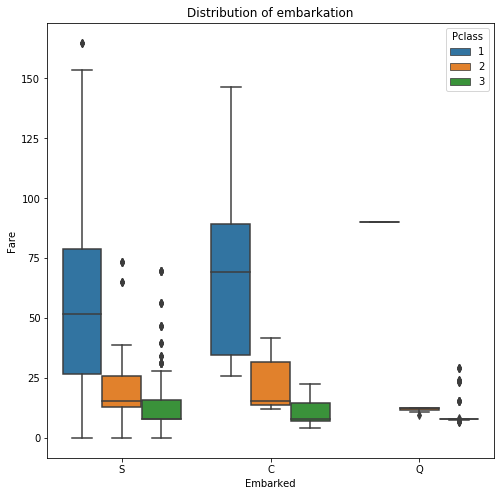

In [8]:
#look at distribution, and see which Embarked group matches the two ladies
feats = ['Pclass', 'Embarked', 'Fare']
dist_df = pd.concat([train_df[feats], test_df[feats]], axis=0)

plt.subplots(figsize=(8,8))
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=dist_df[dist_df.Fare<200]);
plt.title("Distribution of embarkation")

print("Then for a 1st Passenger class with Cabin B: ")
train_df[(train_df.Pclass==1)&(train_df.Cabin.str[0]=='B')&(train_df.Fare>70)&(train_df.Fare<85)].Embarked.value_counts()

In [9]:
#the ladies are more likely to embark from Cheburg (C), hence fillna() with C
train_df.Embarked.fillna('C', inplace=True);
print("Check if fillna works, number of null in Embarked:", train_df.Embarked.isnull().sum())

Check if fillna works, number of null in Embarked: 0


In [10]:
#inspect mising value in test dataset's Fare
test_df[test_df.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
#looking at the above boxplot distribution, the sir is morelikely to pay:
mean = train_df[(train_df.Embarked=='S')&(train_df.Pclass==3)].Fare.mean()
print("Mean Fare for 3rd SocioClass coming from SouthHampton: USD", mean)

#fillna
test_df.Fare.fillna(mean, inplace=True)
print("Check if fillna works, number of null in Fare:", test_df.Fare.isnull().sum())

Mean Fare for 3rd SocioClass coming from SouthHampton: USD 14.644083002832863
Check if fillna works, number of null in Fare: 0


In [12]:
#let's label the Cabin (eg. B28) with it's first letter, drop the number code behind
train_df.Cabin = train_df.Cabin.str[0]
test_df.Cabin = test_df.Cabin.str[0]

#handle missing Cabin
train_df.Cabin.fillna('N', inplace=True)
test_df.Cabin.fillna('N', inplace=True)

#display 
pd.concat([train_df.Cabin.value_counts(), test_df.Cabin.value_counts()], axis=1)

,Cabin,Cabin
A,15,7.0
B,47,18.0
C,59,35.0
D,33,13.0
E,32,9.0
F,13,8.0
G,4,1.0
N,687,327.0
T,1,NaN


In [13]:
#missing Age
print("Train age percentage missing value:", train_df.Age.isnull().sum()/train_df.shape[0]*100)
print("Test age percentage missing value:", test_df.Age.isnull().sum()/test_df.shape[0]*100)

Train age percentage missing value: 19.865319865319865
Test age percentage missing value: 20.574162679425836


Data Visualisation

In [14]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

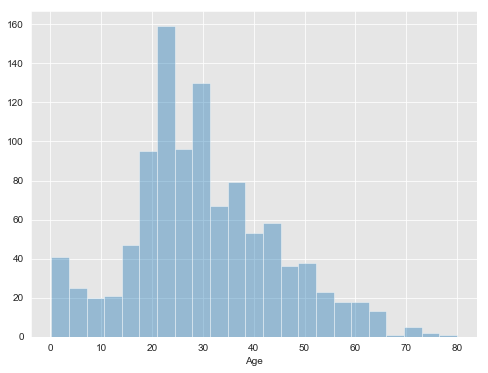

In [15]:
#histogram of age distribution
plt.subplots(figsize=(8,6))
sns.distplot(pd.concat([train_df, test_df]).Age.dropna(), kde=False, hist=True);

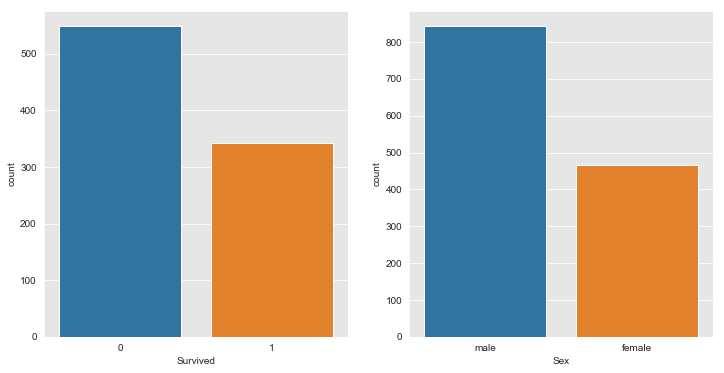

In [16]:
#countplot Survived and Sex ratio
_, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = sns.countplot(x='Survived', data=train_df, ax=axes[0])
ax = sns.countplot(x='Sex', data=pd.concat([train_df,test_df]), ax=axes[1])

Text(0.5, 1.0, 'Survival Rate over Gender')

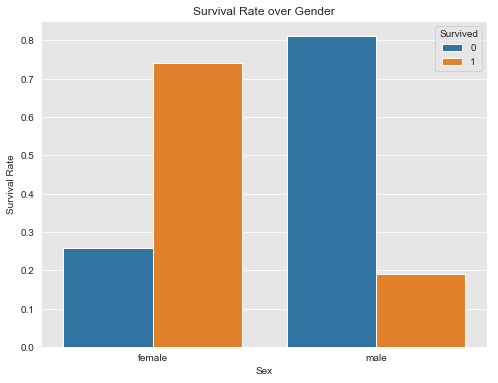

In [17]:
#Barplot Sex
x, y, hue = 'Sex', 'Survival Rate', 'Survived'
sex_df = (train_df[hue]
          .groupby(train_df[x])
          .value_counts(normalize=True)
          .rename(y)
          .reset_index())

#plotting
plt.subplots(figsize=(8,6))
ax = sns.barplot(x=x, y=y, hue=hue, data=sex_df)
plt.title("Survival Rate over Gender")

In [18]:
# define Barplotting function
def barplot_titanic(x, y, hue, data, figsize=(8,6), title="Title", pal=None):
    sub_df = (data[hue]
                 .groupby(data[x])
                 .value_counts(normalize=True)
                 .rename(y)
                 .reset_index())
    plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x, y=y, hue=hue, data=sub_df, palette=pal)
    plt.title(title)

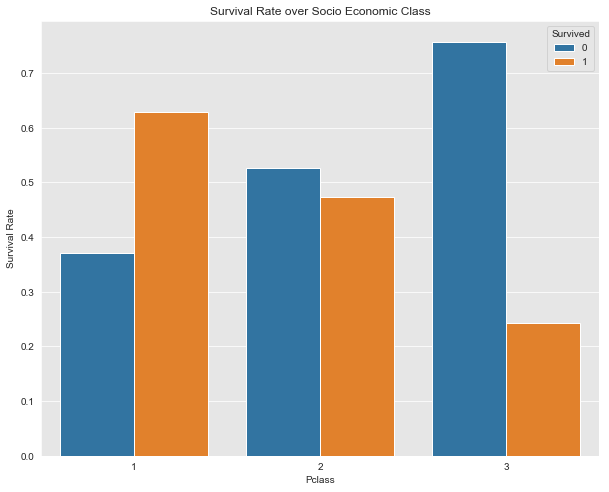

In [19]:
#Barplot PClass
x, y, hue = 'Pclass', 'Survival Rate', 'Survived'
barplot_titanic(x, y, hue, train_df, figsize=(10,8), title='Survival Rate over Socio Economic Class')

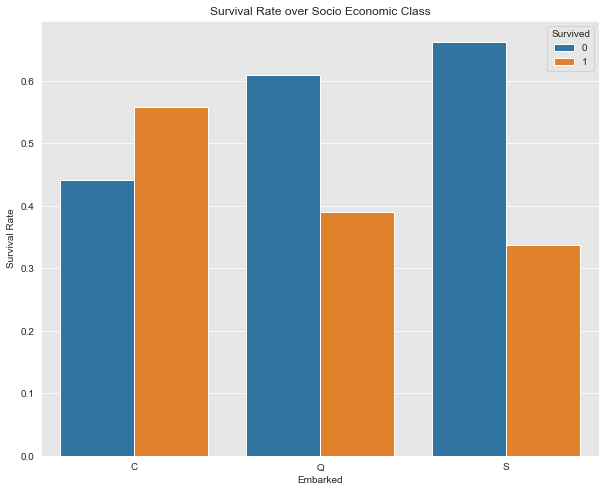

In [20]:
#Barplot PClass
x, y, hue = 'Embarked', 'Survival Rate', 'Survived'
barplot_titanic(x, y, hue, train_df, figsize=(10,8), title='Survival Rate over Socio Economic Class', pal=None)

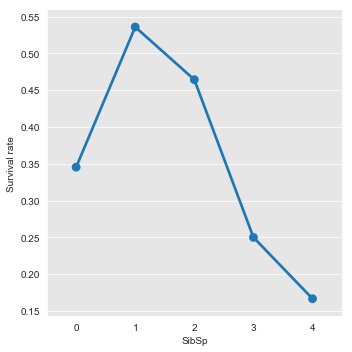

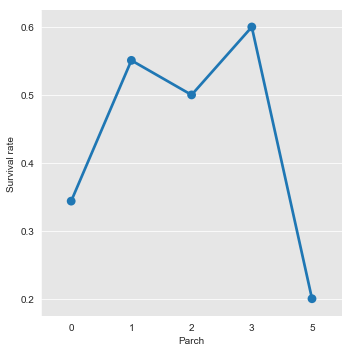

In [21]:
x1, x2, y, group = 'SibSp', 'Parch', 'Survival rate', 'Survived'

#Factorplot
sibsp_df = (train_df[group]
            .groupby(train_df[x1])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())
parch_df = (train_df[group]
            .groupby(train_df[x2])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())

#plotting
sns.factorplot(x=x1, y=y, data=sibsp_df[sibsp_df.Survived==1]);
sns.factorplot(x=x2, y=y, data=parch_df[parch_df.Survived==1]);

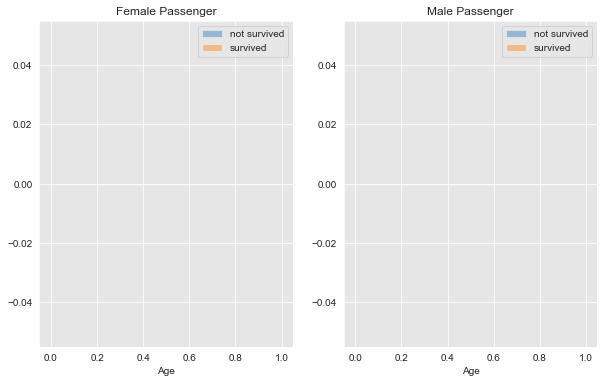

In [46]:
#Kernel Density plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

female_df = train_df[train_df.Sex==1]
male_df = train_df[train_df.Sex==0]

#plotting female
ax = sns.distplot(female_df[female_df.Survived==0].Age.dropna(), bins=30, label='not survived', ax=axes[0], kde=False) #female
ax = sns.distplot(female_df[female_df.Survived==1].Age.dropna(), bins=30, label='survived', ax=axes[0], kde=False)#female
ax.set_title('Female Passenger')
ax.legend();

#plotting male
ax = sns.distplot(male_df[male_df.Survived==0].Age.dropna(), bins=30, label='not survived', ax=axes[1], kde=False) #female
ax = sns.distplot(male_df[male_df.Survived==1].Age.dropna(), bins=30, label='survived', ax=axes[1], kde=False)#female
ax.set_title('Male Passenger')
ax.legend();

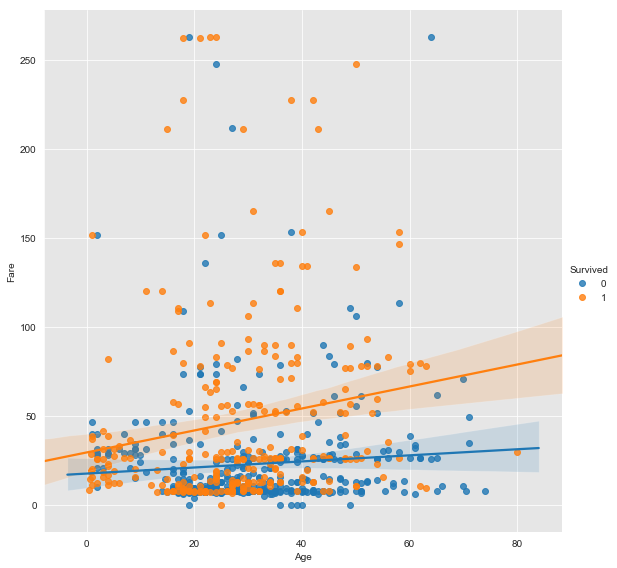

In [23]:
#lmplot
ax = sns.lmplot(x='Age', y='Fare', hue='Survived', data=train_df[train_df.Fare<280], size=8)

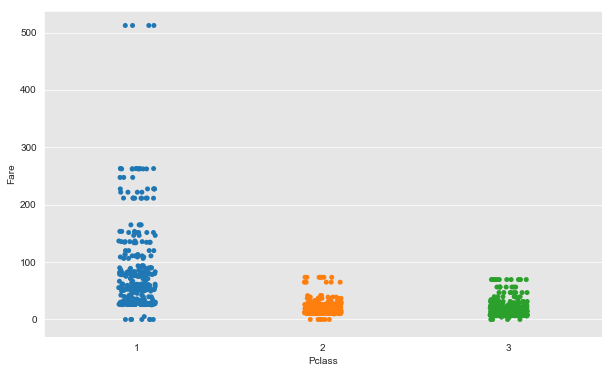

In [24]:
#
plt.subplots(figsize=(10,6))
ax = sns.stripplot(x="Pclass", y="Fare", data=pd.concat([train_df, test_df]), jitter=True)

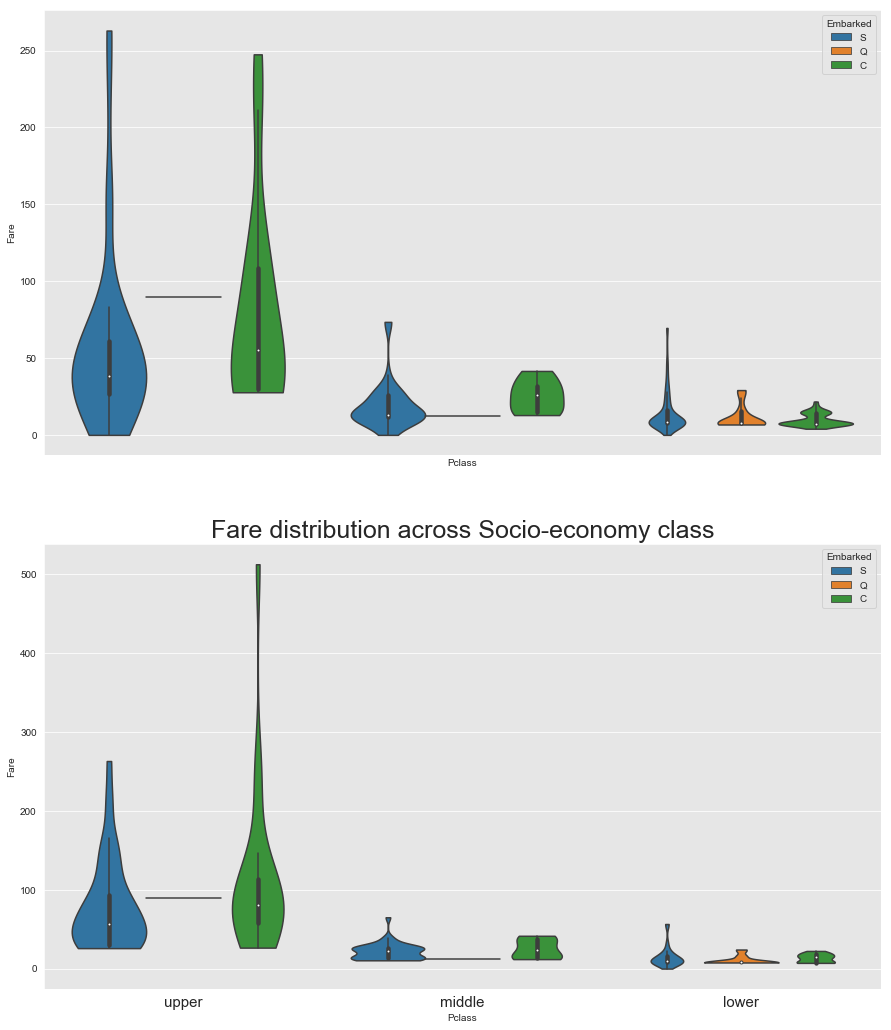

In [25]:
#Violin Plot over Fare
_, axes = plt.subplots(2, 1, figsize=(15,18), sharex=True)

sns.violinplot(x='Pclass', y='Fare', hue='Embarked', hue_order=['S', 'Q', 'C'], cut=0,
               data=train_df[train_df.Survived==0], ax=axes[0])
plt.xticks([0,1,2], ['upper', 'middle', 'lower'], fontsize=15)
plt.title('Fare distribution across Socio-economy class', fontsize=25);

sns.violinplot(x='Pclass', y='Fare', hue='Embarked', hue_order=['S', 'Q', 'C'], cut=0,
               data=train_df[train_df.Survived==1], ax=axes[1])
plt.xticks([0,1,2], ['upper', 'middle', 'lower'], fontsize=15)
plt.title('Fare distribution across Socio-economy class', fontsize=25);

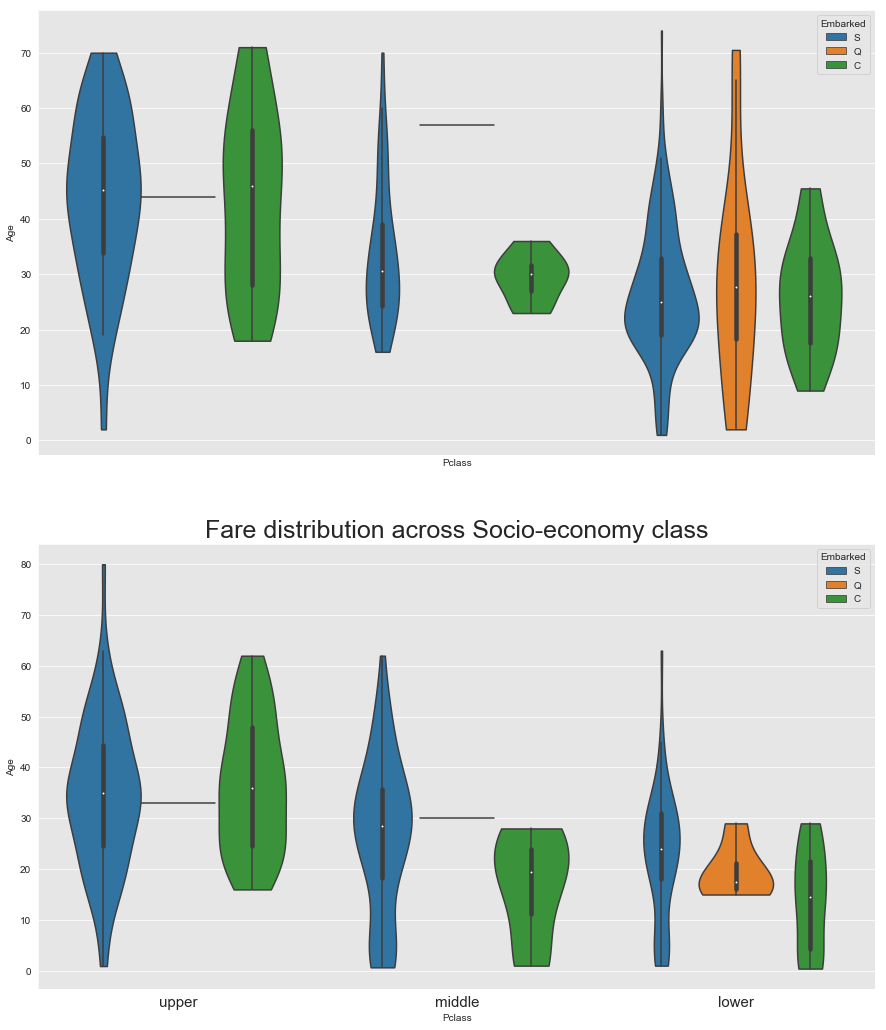

In [26]:
#Violin Plot over Age
_, axes = plt.subplots(2, 1, figsize=(15,18), sharex=True)

sns.violinplot(x='Pclass', y='Age', hue='Embarked', hue_order=['S', 'Q', 'C'], cut=0,
               data=train_df[train_df.Survived==0], ax=axes[0])
plt.xticks([0,1,2], ['upper', 'middle', 'lower'], fontsize=15)
plt.title('Fare distribution across Socio-economy class', fontsize=25);

sns.violinplot(x='Pclass', y='Age', hue='Embarked', hue_order=['S', 'Q', 'C'], cut=0,
               data=train_df[train_df.Survived==1], ax=axes[1])
plt.xticks([0,1,2], ['upper', 'middle', 'lower'], fontsize=15)
plt.title('Fare distribution across Socio-economy class', fontsize=25);

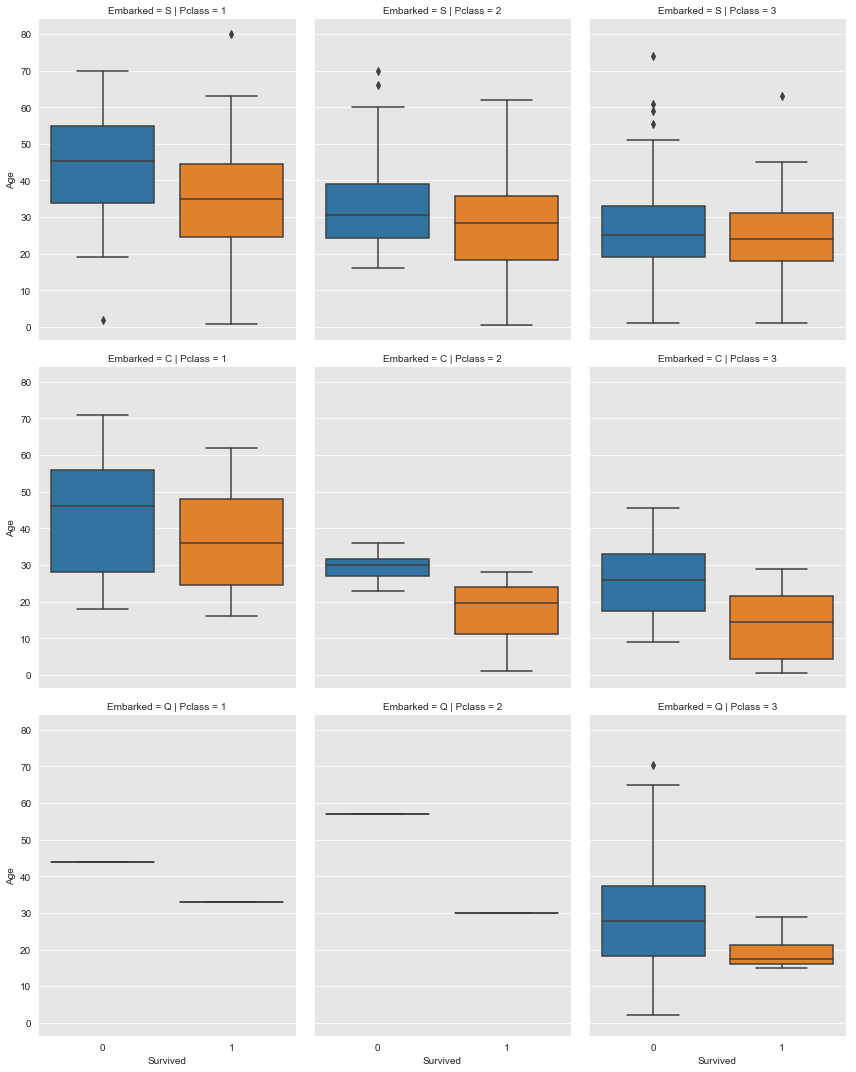

In [27]:
#Boxplot
x, y, col, row = 'Survived', 'Age', 'Pclass', 'Embarked'
sns.factorplot(x=x, y=y, col=col, row=row, data=train_df, kind='box', size=5, aspect=.8);

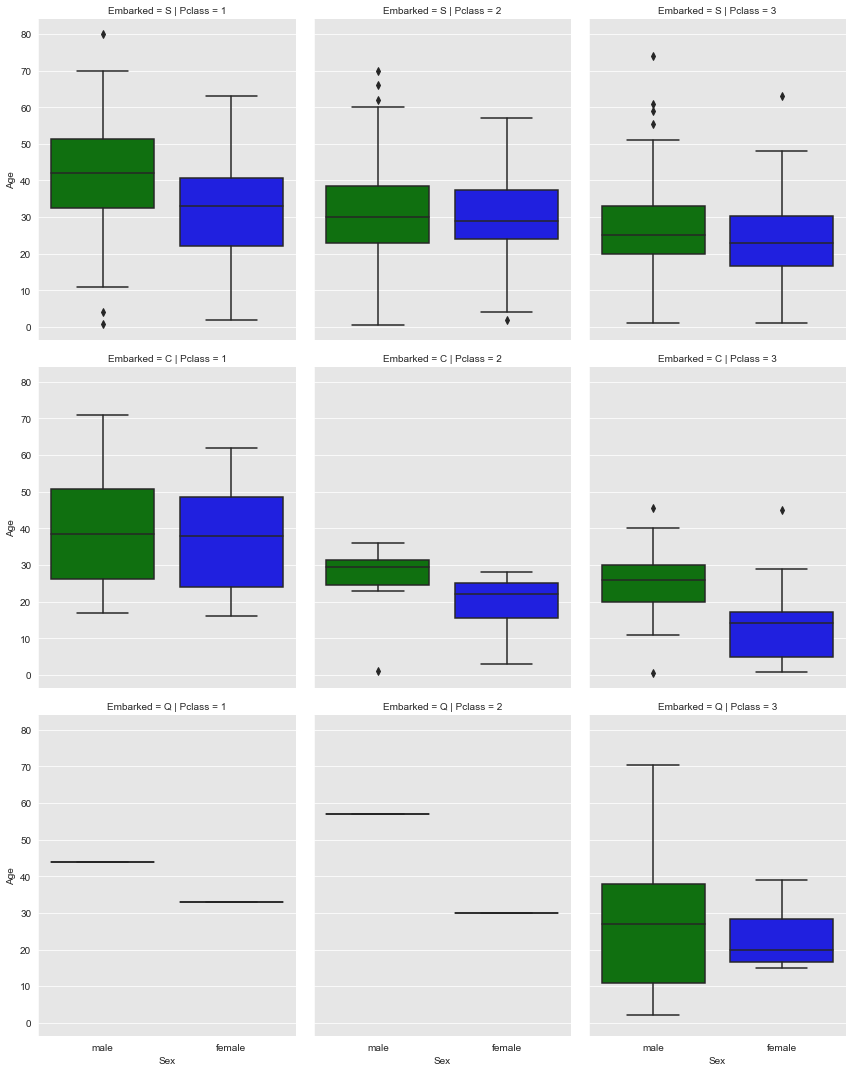

In [45]:
#Boxplot
x, y, col, row = 'Sex', 'Age', 'Pclass', 'Embarked'
sns.catplot(x=x, y=y, col=col, row=row, 
            data=train_df[train_df.Fare<280], kind='box', size=5, aspect=.8, palette=['green', 'blue']);

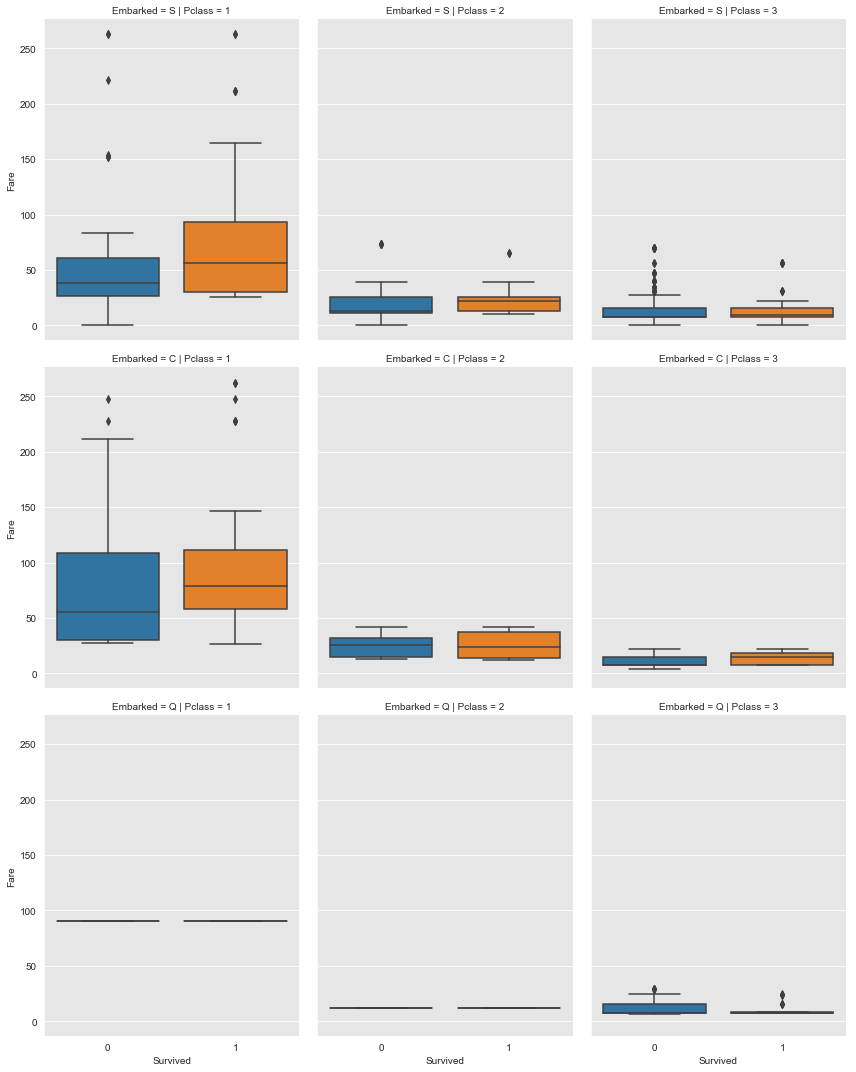

In [28]:
#Boxplot
x, y, col, row = 'Survived', 'Fare', 'Pclass', 'Embarked'
sns.factorplot(x=x, y=y, col=col, row=row, data=train_df[train_df.Fare<280], kind='box', size=5, aspect=.8);

In [29]:
#numerical/float stats overview 
pd.concat([train_df,test_df]).describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.281231,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.741447,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [30]:
#categorical stats overview
pd.concat([train_df,test_df]).describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,1309,1309,1309,1309,1309
unique,9,3,1307,2,929
top,N,S,"Connolly, Miss. Kate",male,CA. 2343
freq,1014,914,2,843,11


In [31]:
#Overview on PClass
train_df[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
#Overview on Sex/gender
survived_summary = train_df.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
1,male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [33]:
#Overview on Pclass
(train_df.groupby('Pclass')
    .mean()
    .reset_index())

,Pclass,Survived,Age,SibSp,Parch,Fare
0,1,0.629630,38.233441,0.416667,0.356481,84.154687
1,2,0.472826,29.877630,0.402174,0.380435,20.662183
2,3,0.242363,25.140620,0.615071,0.393075,13.675550


In [34]:
#Overview on Embarked
(train_df.groupby('Embarked')
    .mean()
    .reset_index())

,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,C,0.558824,1.876471,31.105455,0.382353,0.358824,60.189978
1,Q,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
2,S,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


I have gathered a small summary from the statistical overview above. Let's see what they are...

- This data set has 891 raw and 9 columns.
- only 38% passenger survived during that tragedy.
- ~74% female passenger survived, while only ~19% male passenger survived.
- ~63% first class passengers survived, while only 24% lower class passenger survived.


Correlations

In [35]:
#calculate correlation
pd.DataFrame(train_df.corr()['Survived'].sort_values())

,Survived
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Survived,1.000000


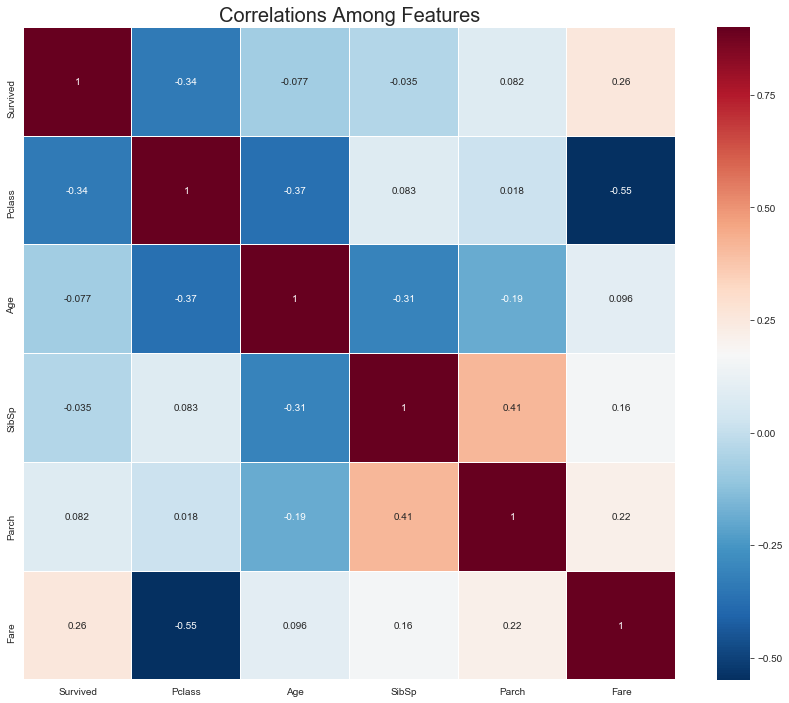

In [36]:
#correlation heatmap
plt.subplots(figsize = (15,12))
sns.heatmap(train_df.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True);

plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

A. Positive Correlation Features:
- Fare and Survived: 0.26

B. Negative Correlation Features:
- Fare and Pclass: -0.6
- Sex and Survived: -0.55
- Pclass and Survived: -0.33

So, Let's analyze these correlations a bit. We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. This relationship reveals that the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). 

This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.54 which points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is.

In [37]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
